![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Redes Neuronales

En este notebook aprenderá a construir y a entrenar redes neuronales de una capa y multicapas, usando la librería [Keras](https://keras.io/).

Este notebook tiene una licencia de [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Un agradecimiento especial para [Valerio Maggio](https://mpba.fbk.eu).

## Instrucciones Generales

Keras es una librería de redes neuronales altamente modular, escrita en Python y capaz de ejecutarse sobre TensorFlow o Theano. Fue desarrollada con el objetivo de permitir una experimentación rápida con modelos de redes neuronales.

Este notebook esta compuesto por dos secciones. En la primera sección, usted beberá construir y entrenar una red neuronal de una capa para predecir el precio de una casa con el set de datos Boston Housing Data. En la segunda parte, se usará el mismo dataset pero usted beberá construir y entrenar una red neuronal multicapa para identificar sus ventajas. Para conocer más detalles de la base, puede ingresar al siguiente [vínculo](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/).
   
Para realizar la actividad, solo siga las indicaciones asociadas a cada celda del notebook. 

## Importar base de datos y librerías

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.datasets import fetch_california_housing
# Carga de datos de la librería sklearn
california_housing = fetch_california_housing()
dataset = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
dataset['PRICE'] = california_housing.target

dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Definición de variables predictoras  y de interés

In [4]:
# Definición de variables predictoras (X)
X = dataset.drop('PRICE', axis=1)

# Definición de variable de interés (y)
Y = pd.DataFrame(california_housing.target, columns=['labels'])

In [5]:
Y

,labels
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.3 ,random_state=22)

In [7]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [8]:
# Definición de dimensiones de salida, varaibles de interés
output_var = Y_train.shape[1]
print(output_var, ' output variables')

1  output variables


In [26]:
Y_train

array([[0.946  ],
       [1.875  ],
       [2.666  ],
       ...,
       [2.667  ],
       [5.00001],
       [2.863  ]])

In [9]:
# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

8 input variables


# Red neuronal de una sola capa

In [12]:
# Importación librerías
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

In [13]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

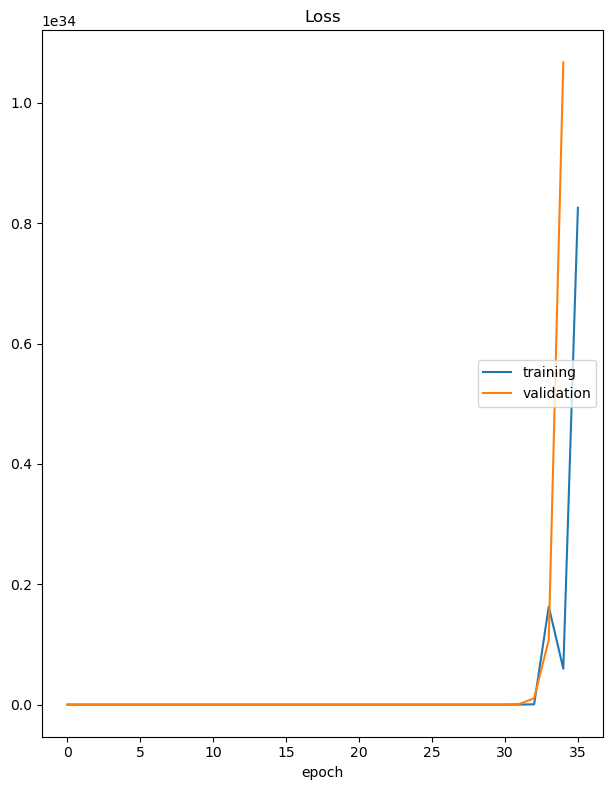

Loss
	training         	 (min:    0.981, max:      inf, cur:      inf)
	validation       	 (min:    1.480, max:      inf, cur:      inf)
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: inf - val_loss: inf


In [15]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=50, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

## Red neuronal de una sola capa con early stopping

In [16]:
# Importación librerías
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [17]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [18]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

In [19]:
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

In [20]:
# Entrenamiento de la red neuronal con 50 épocas y early stopping
model.fit(X_train, Y_train, 
          verbose=True, 
          epochs=50, 
          batch_size=128,
          validation_data=(X_test,Y_test),
          callbacks=[best_model, early_stop])

Epoch 1/50
 89/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6785

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.2449 - val_loss: 0.9104
Epoch 2/50
 95/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9265 

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9323 - val_loss: 0.6804
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8799

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8791 - val_loss: 0.6289
Epoch 4/50
104/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6995

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6958 - val_loss: 0.5758
Epoch 5/50
105/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7072

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7033 - val_loss: 0.5549
Epoch 6/50
 91/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6080

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6071 - val_loss: 0.5272
Epoch 7/50
110/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5905

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5904 - val_loss: 0.5190
Epoch 8/50
 95/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5696

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5694 - val_loss: 0.5084
Epoch 9/50
 94/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5595

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5599 - val_loss: 0.5044
Epoch 10/50
 92/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5820

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5785 - val_loss: 0.4976
Epoch 11/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5602 - val_loss: 0.4993
Epoch 12/50
 92/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5576

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5570 - val_loss: 0.4928
Epoch 13/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5503 - val_loss: 0.4943
Epoch 14/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5492 - val_loss: 0.4949
Epoch 14: early stopping


# Red Neuronal Multicapa

In [21]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,353 (267.00 KB)

 Trainable params: 68,353 (267.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

In [23]:
# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

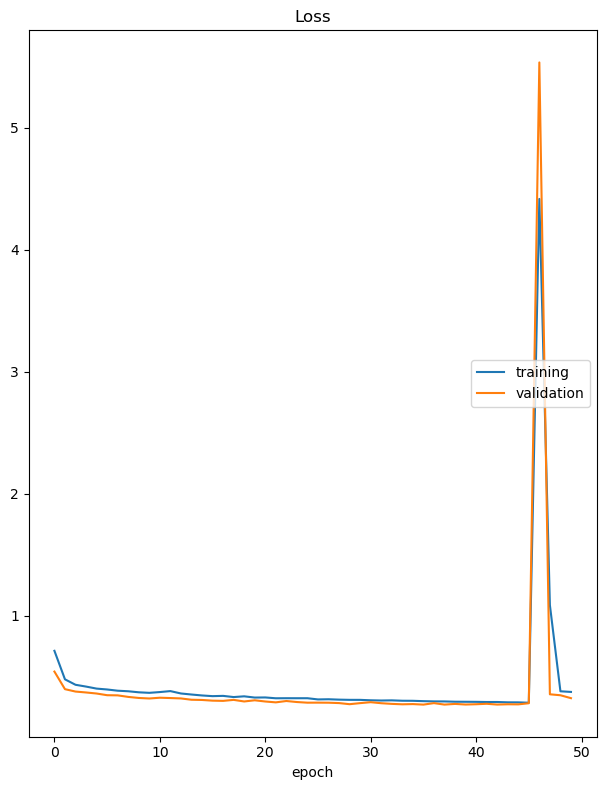

Loss
	training         	 (min:    0.286, max:    4.415, cur:    0.375)
	validation       	 (min:    0.271, max:    5.534, cur:    0.323)
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3865 - val_loss: 0.3234


In [24]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=50, 
          callbacks=[PlotLossesKeras()])